# Data Wrangling and Analyzing

## Introduction
In this project I am going to gather and analyz twitter data to create interesting and trustworthy analyses and visualizations.

###### Import libraries:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import tweepy
import requests
import json

## Data Wrangling

First, I download the twitter archive file from Udacity, and upload to jupyter notebook. Then use read function to load the file.

In [4]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


Second, I use request function to access the file from the provided url. 

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)
response # <Response [200]> means succeeded

<Response [200]>

Then, write the content of the response to get the tweet image predictions file.

In [6]:
with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

Since it is a .tsv file, I use read function again to load the file.

In [7]:
df_predict = pd.read_csv('image_predictions.tsv', sep = "\t")
df_predict.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


Third, I create a twitter developer account to get access data from twitter API.

In [7]:
consumer_key = 'x'
consumer_secret = 'x'
access_token = 'x'
access_secret = 'x'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit = True , wait_on_rate_limit_notify = True)

Then, I get the data with the list of id from twitter-archive and dump them into a json file.

In [53]:
id_list = list(df_t['tweet_id'].unique())
with open('tweet_json.txt', 'w') as file:
    for id in id_list: 
        try:
            tweet = api.get_status(id, tweet_mode = "extended")
            json.dump(tweet._json, file)
            file.write('\n')
            print(f"Gathered id: {id}") 
        except:
            print(f"Error - id: {id}")
 

Gathered id: 892420643555336193
Gathered id: 892177421306343426
Gathered id: 891815181378084864
Gathered id: 891689557279858688
Gathered id: 891327558926688256
Gathered id: 891087950875897856
Gathered id: 890971913173991426
Gathered id: 890729181411237888
Gathered id: 890609185150312448
Gathered id: 890240255349198849
Gathered id: 890006608113172480
Gathered id: 889880896479866881
Gathered id: 889665388333682689
Gathered id: 889638837579907072
Gathered id: 889531135344209921
Gathered id: 889278841981685760
Gathered id: 888917238123831296
Gathered id: 888804989199671297
Gathered id: 888554962724278272
Error - id: 888202515573088257
Gathered id: 888078434458587136
Gathered id: 887705289381826560
Gathered id: 887517139158093824
Gathered id: 887473957103951883
Gathered id: 887343217045368832
Gathered id: 887101392804085760
Gathered id: 886983233522544640
Gathered id: 886736880519319552
Gathered id: 886680336477933568
Gathered id: 886366144734445568
Gathered id: 886267009285017600
Gathered 

Gathered id: 843604394117681152
Gathered id: 843235543001513987
Error - id: 842892208864923648
Gathered id: 842846295480000512
Gathered id: 842765311967449089
Gathered id: 842535590457499648
Gathered id: 842163532590374912
Gathered id: 842115215311396866
Gathered id: 841833993020538882
Gathered id: 841680585030541313
Gathered id: 841439858740625411
Gathered id: 841320156043304961
Gathered id: 841314665196081154
Gathered id: 841077006473256960
Gathered id: 840761248237133825
Gathered id: 840728873075638272
Gathered id: 840698636975636481
Gathered id: 840696689258311684
Gathered id: 840632337062862849
Gathered id: 840370681858686976
Gathered id: 840268004936019968
Gathered id: 839990271299457024
Gathered id: 839549326359670784
Gathered id: 839290600511926273
Gathered id: 839239871831150596
Gathered id: 838952994649550848
Gathered id: 838921590096166913
Gathered id: 838916489579200512
Gathered id: 838831947270979586
Gathered id: 838561493054533637
Gathered id: 838476387338051585
Gathered 

Gathered id: 811386762094317568
Gathered id: 810984652412424192
Gathered id: 810896069567610880
Gathered id: 810657578271330305
Gathered id: 810284430598270976
Gathered id: 810254108431155201
Gathered id: 809920764300447744
Gathered id: 809808892968534016
Gathered id: 809448704142938112
Gathered id: 809220051211603969
Gathered id: 809084759137812480
Gathered id: 808838249661788160
Gathered id: 808733504066486276
Gathered id: 808501579447930884
Gathered id: 808344865868283904
Gathered id: 808134635716833280
Gathered id: 808106460588765185
Gathered id: 808001312164028416
Gathered id: 807621403335917568
Gathered id: 807106840509214720
Gathered id: 807059379405148160
Gathered id: 807010152071229440
Gathered id: 806629075125202948
Gathered id: 806620845233815552
Gathered id: 806576416489959424
Gathered id: 806542213899489280
Gathered id: 806242860592926720
Gathered id: 806219024703037440
Gathered id: 805958939288408065
Gathered id: 805932879469572096
Gathered id: 805826884734976000
Gathered

Gathered id: 776477788987613185
Gathered id: 776249906839351296
Gathered id: 776218204058357768
Gathered id: 776201521193218049
Gathered id: 776113305656188928
Gathered id: 776088319444877312
Gathered id: 775898661951791106
Gathered id: 775842724423557120
Gathered id: 775733305207554048
Gathered id: 775729183532220416
Gathered id: 775364825476165632
Gathered id: 775350846108426240
Error - id: 775096608509886464
Gathered id: 775085132600442880
Gathered id: 774757898236878852
Gathered id: 774639387460112384
Gathered id: 774314403806253056
Gathered id: 773985732834758656
Gathered id: 773922284943896577
Gathered id: 773704687002451968
Gathered id: 773670353721753600
Gathered id: 773547596996571136
Gathered id: 773336787167145985
Gathered id: 773308824254029826
Gathered id: 773247561583001600
Gathered id: 773191612633579521
Gathered id: 772877495989305348
Gathered id: 772826264096874500
Gathered id: 772615324260794368
Gathered id: 772581559778025472
Gathered id: 772193107915964416
Gathered 

Gathered id: 745789745784041472
Gathered id: 745712589599014916
Gathered id: 745433870967832576
Gathered id: 745422732645535745
Gathered id: 745314880350101504
Gathered id: 745074613265149952
Gathered id: 745057283344719872
Gathered id: 744995568523612160
Gathered id: 744971049620602880
Gathered id: 744709971296780288
Gathered id: 744334592493166593
Gathered id: 744234799360020481
Gathered id: 744223424764059648
Gathered id: 743980027717509120
Gathered id: 743895849529389061
Gathered id: 743835915802583040
Gathered id: 743609206067040256
Gathered id: 743595368194129920
Gathered id: 743545585370791937
Gathered id: 743510151680958465
Gathered id: 743253157753532416
Gathered id: 743222593470234624
Gathered id: 743210557239623680
Gathered id: 742534281772302336
Gathered id: 742528092657332225
Gathered id: 742465774154047488
Gathered id: 742423170473463808
Gathered id: 742385895052087300
Gathered id: 742161199639494656
Gathered id: 742150209887731712
Gathered id: 741793263812808706
Gathered

Gathered id: 708469915515297792
Gathered id: 708400866336894977
Gathered id: 708356463048204288
Gathered id: 708349470027751425
Gathered id: 708149363256774660
Gathered id: 708130923141795840
Gathered id: 708119489313951744
Gathered id: 708109389455101952
Gathered id: 708026248782585858
Gathered id: 707995814724026368
Gathered id: 707983188426153984
Gathered id: 707969809498152960
Gathered id: 707776935007539200
Gathered id: 707741517457260545
Gathered id: 707738799544082433
Gathered id: 707693576495472641
Gathered id: 707629649552134146
Gathered id: 707610948723478529
Gathered id: 707420581654872064
Gathered id: 707411934438625280
Gathered id: 707387676719185920
Gathered id: 707377100785885184
Gathered id: 707315916783140866
Gathered id: 707297311098011648
Gathered id: 707059547140169728
Gathered id: 707038192327901184
Gathered id: 707021089608753152
Gathered id: 707014260413456384
Gathered id: 706904523814649856
Gathered id: 706901761596989440
Gathered id: 706681918348251136
Gathered

Gathered id: 689557536375177216
Gathered id: 689517482558820352
Gathered id: 689289219123089408
Gathered id: 689283819090870273
Gathered id: 689280876073582592
Gathered id: 689275259254616065
Gathered id: 689255633275777024
Gathered id: 689154315265683456
Gathered id: 689143371370250240
Gathered id: 688916208532455424
Gathered id: 688908934925697024
Gathered id: 688898160958271489
Gathered id: 688894073864884227
Gathered id: 688828561667567616
Gathered id: 688804835492233216
Gathered id: 688789766343622656
Gathered id: 688547210804498433
Gathered id: 688519176466644993
Gathered id: 688385280030670848
Gathered id: 688211956440801280
Gathered id: 688179443353796608
Gathered id: 688116655151435777
Gathered id: 688064179421470721
Gathered id: 687841446767013888
Gathered id: 687826841265172480
Gathered id: 687818504314159109
Gathered id: 687807801670897665
Gathered id: 687732144991551489
Gathered id: 687704180304273409
Gathered id: 687664829264453632
Gathered id: 687494652870668288
Gathered

Gathered id: 676975532580409345
Gathered id: 676957860086095872
Gathered id: 676949632774234114
Gathered id: 676948236477857792
Gathered id: 676946864479084545
Gathered id: 676942428000112642
Gathered id: 676936541936185344
Gathered id: 676916996760600576
Gathered id: 676897532954456065
Gathered id: 676864501615042560
Gathered id: 676821958043033607
Gathered id: 676819651066732545
Gathered id: 676811746707918848
Gathered id: 676776431406465024
Gathered id: 676617503762681856
Gathered id: 676613908052996102
Gathered id: 676606785097199616
Gathered id: 676603393314578432
Gathered id: 676593408224403456
Gathered id: 676590572941893632
Gathered id: 676588346097852417
Gathered id: 676582956622721024
Gathered id: 676575501977128964
Gathered id: 676533798876651520
Gathered id: 676496375194980353
Gathered id: 676470639084101634
Gathered id: 676440007570247681
Gathered id: 676430933382295552
Gathered id: 676263575653122048
Gathered id: 676237365392908289
Gathered id: 676219687039057920
Gathered

Gathered id: 671347597085433856
Gathered id: 671186162933985280
Gathered id: 671182547775299584
Gathered id: 671166507850801152
Gathered id: 671163268581498880
Gathered id: 671159727754231808
Gathered id: 671154572044468225
Gathered id: 671151324042559489
Gathered id: 671147085991960577
Gathered id: 671141549288370177
Gathered id: 671138694582165504
Gathered id: 671134062904504320
Gathered id: 671122204919246848
Gathered id: 671115716440031232
Gathered id: 671109016219725825
Gathered id: 670995969505435648
Gathered id: 670842764863651840
Gathered id: 670840546554966016
Gathered id: 670838202509447168
Gathered id: 670833812859932673
Gathered id: 670832455012716544
Gathered id: 670826280409919488
Gathered id: 670823764196741120
Gathered id: 670822709593571328
Gathered id: 670815497391357952
Gathered id: 670811965569282048
Gathered id: 670807719151067136
Gathered id: 670804601705242624
Gathered id: 670803562457407488
Gathered id: 670797304698376195
Gathered id: 670792680469889025
Gathered

Gathered id: 666649482315059201
Gathered id: 666644823164719104
Gathered id: 666454714377183233
Gathered id: 666447344410484738
Gathered id: 666437273139982337
Gathered id: 666435652385423360
Gathered id: 666430724426358785
Gathered id: 666428276349472768
Gathered id: 666421158376562688
Gathered id: 666418789513326592
Gathered id: 666411507551481857
Gathered id: 666407126856765440
Gathered id: 666396247373291520
Gathered id: 666373753744588802
Gathered id: 666362758909284353
Gathered id: 666353288456101888
Gathered id: 666345417576210432
Gathered id: 666337882303524864
Gathered id: 666293911632134144
Gathered id: 666287406224695296
Gathered id: 666273097616637952
Gathered id: 666268910803644416
Gathered id: 666104133288665088
Gathered id: 666102155909144576
Gathered id: 666099513787052032
Gathered id: 666094000022159362
Gathered id: 666082916733198337
Gathered id: 666073100786774016
Gathered id: 666071193221509120
Gathered id: 666063827256086533
Gathered id: 666058600524156928
Gathered

After getting the data, I extract the data I want from the json file and create a dataframe with pandas function.

In [8]:
data_api = []
with open ('tweet_json.txt',"r") as json_file:
    for line in json_file:
        tweet = json.loads(line)
        data_api.append({
                        'tweet_id' : tweet["id"],
                        'favorite_count' : tweet["favorite_count"],
                        'retweet_count' :tweet["retweet_count"],
                        })


In [9]:
df_api = pd.DataFrame(data_api, columns = ['tweet_id','favorite_count','retweet_count'])

In [10]:
df_api.head(2)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36385,7741
1,892177421306343426,31336,5730


### Data Assessing
#### df_predict table

In [11]:
df_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


> 1. Prediction sometimes are lowercase, sometimes are uppercase.

> 2. Some predictions are not dogs.

> 3. Three predictions should merge into one with the highest confident level.


In [12]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> tweet_id should be str instead of int

In [13]:
df_predict.jpg_url.duplicated().sum()

66

>There are retweets or duplicate tweets

In [14]:
df_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### df_archive table

In [15]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


>1. contain lots of null in in_reply_to_user_id , in_reply_to_status_id, retweeted_status_id,	retweeted_status_user_id, retweeted_status_timestamp columns

>2. Doggo, floofer, pupper, puppo should be in one column for a single observation

>3. Some dogs are not in any of the doggo, floofer, pupper or puppo category.

In [16]:
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Tucker         10
Penny          10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
Buddy           7
Daisy           7
Bailey          7
an              7
Toby            7
Rusty           6
Jack            6
Dave            6
Scout           6
Koda            6
Bella           6
Oscar           6
Milo            6
Leo             6
Jax             6
Stanley         6
Sammy           5
             ... 
Sweet           1
Bobbay          1
River           1
Timofy          1
Kona            1
Ruffles         1
Obie            1
Sora            1
Lillie          1
Dallas          1
Horace          1
Damon           1
Pancake         1
Ember           1
Jeremy          1
Kulet           1
old             1
Arlen           1
Gerbald         1
Lacy            1
Wiggles         1
Sunshine        1
Erik            1
Acro            1
Mairi     

>Some names are not correct.

In [17]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

>1. tweet_id should be str

>2. timestamp and retweeted_status_timestamp should be datetime

>3. There are some retweets and replies.

In [18]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> Even though some of the rating_numerator and rating_denominator are higher than 10, it is a big part of the popularity of WeRateDogs so it should be fine.

#### df_api table

In [19]:
df_api

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36385,7741
1,892177421306343426,31336,5730
2,891815181378084864,23612,3794
3,891689557279858688,39682,7907
4,891327558926688256,37883,8528
5,891087950875897856,19072,2852
6,890971913173991426,11113,1861
7,890729181411237888,61307,17274
8,890609185150312448,26268,3935
9,890240255349198849,30008,6734


In [20]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


>tweet_id should be str instead of int

In [21]:
df_api.describe()

,tweet_id,favorite_count,retweet_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7598.035178,2717.089661
std,6.823170e+16,11790.555246,4596.358525
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1326.000000,548.500000
50%,7.182469e+17,3309.000000,1275.000000
75%,7.986692e+17,9308.000000,3155.000000
max,8.924206e+17,157066.000000,78242.000000


### Summary

#### Tidiness
1. All three tables should merge into one table

##### df_predict table
#### Quality
1. Prediction sometimes are lowercase, sometimes are uppercase
2. Some predictions are not dogs
3. Column tweet_id should be str type instead of int

#### Tidiness
1. Three predictions should merge into one with the highest confident level

##### df_archive table
#### Quality
1. Some dogs are not in any of the doggo, floofer, pupper or puppo category
2. Some names are not correct
3. Column tweet_id should be str type
4. Column timestamp and retweeted_status_timestamp should be datetime type
5. There are some retweets or duplicated tweets and replies

#### Tidiness
1. Doggo, floofer, pupper, puppo should be in one column for a single observation

##### df_api table
#### Quality
1. tweet_id should be str instead of int



## Data Cleaning

#### 1. Three table should merge into one table

Since all three tables share the same tweet_id, I use merge function to merge them by tweeet id. Then make a copy of it.

#### Cleaning:

In [121]:
df_all = pd.merge(df_archive, df_api, on = "tweet_id", how = "outer")
df_all = pd.merge(df_all, df_predict, on = "tweet_id", how = "outer")
df_all_clean = df_all.copy()

#### Testing:

In [122]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_count                23

#### 2. Removing the retweets and replies
By filtering the NaN of retweeted_status_user_id and in_reply_to_status_id, remove those are retweets and replies.

#### Cleaning:

In [123]:
df_all_clean = df_all_clean[df_all_clean['retweeted_status_id'].isnull()] #remove retweets
df_all_clean = df_all_clean[df_all_clean['in_reply_to_status_id'].isnull()] #remove replies

#### Testing:

In [124]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
favorite_count                2090 non-n

#### 3.Drop the columns are not going to use.

After removing the retweets and replies, some useless columns can be drop.

#### Cleaning:

In [125]:
df_all_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                      "retweeted_status_id", "retweeted_status_user_id", 
                      "retweeted_status_timestamp"], inplace=True, axis = 1)

#### Testing:

In [126]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
favorite_count        2090 non-null float64
retweet_count         2090 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-n

#### 4.Drop tweets without image or using the same image.

For tweets without image, I use dropna function to drop them.

#### Cleaning:

In [127]:
df_all_clean.dropna(subset = ['jpg_url'], inplace = True)

#### Testing:

In [128]:
df_all_clean.jpg_url.isnull().sum()

0

Then, I drop the duplicate tweets with drop duplicates.

#### Cleaning:

In [129]:
df_all_clean.jpg_url.drop_duplicates(inplace=True)

#### Testing:

In [130]:
df_all_clean.jpg_url.duplicated().sum()

0

In [131]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
favorite_count        1964 non-null float64
retweet_count         1964 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-n

#### 5.Remove tweets that are not about dogs

Drop data with three predictions that all are not dog.

#### Cleaning:

In [132]:
df_all_clean.drop(df_all_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').index, inplace = True)

#### Testing:

In [133]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 25 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null object
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1666 non-null object
doggo                 1666 non-null object
floofer               1666 non-null object
pupper                1666 non-null object
puppo                 1666 non-null object
favorite_count        1659 non-null float64
retweet_count         1659 non-null float64
jpg_url               1666 non-null object
img_num               1666 non-null float64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null object
p2                    1666 non-null object
p2_conf               1666 non-n

#### 6.Some tweets don't have retweet_count and favorite_count

Drop those tweets without favorite and retweet counts.

#### Cleaning:

In [134]:
df_all_clean.dropna(subset = ['favorite_count'], inplace = True)

#### Testing:

In [135]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 1 to 2355
Data columns (total 25 columns):
tweet_id              1659 non-null int64
timestamp             1659 non-null object
source                1659 non-null object
text                  1659 non-null object
expanded_urls         1659 non-null object
rating_numerator      1659 non-null int64
rating_denominator    1659 non-null int64
name                  1659 non-null object
doggo                 1659 non-null object
floofer               1659 non-null object
pupper                1659 non-null object
puppo                 1659 non-null object
favorite_count        1659 non-null float64
retweet_count         1659 non-null float64
jpg_url               1659 non-null object
img_num               1659 non-null float64
p1                    1659 non-null object
p1_conf               1659 non-null float64
p1_dog                1659 non-null object
p2                    1659 non-null object
p2_conf               1659 non-n

#### 7.Merge the doggo, floofer, pupper and puppo columns into one column 

Doggo, floofer, pupper and puppo are all stages for dog, so they should merge into one column.

In [136]:
df_all_clean.loc[(df_all_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,...,1.0,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
200,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,...,1.0,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True
460,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,...,1.0,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,...,1.0,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True
575,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,...,1.0,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,...,2.0,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True
956,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,...,1.0,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False
1063,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,...,1.0,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1113,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,...,1.0,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False


Since some of the dogs have multiple stages, I use np.nan to replace them with nan values.

#### Cleaning:

In [137]:
for x in ["doggo", "floofer", "pupper", "puppo"]:
    df_all_clean[x].replace("None", np.nan , inplace = True)

#### Testing:

In [138]:
df_all_clean[df_all_clean[['doggo', 'floofer', 'pupper', 'puppo']] == 'None'][['doggo', 'floofer', 'pupper', 'puppo']].count()

doggo      0
floofer    0
pupper     0
puppo      0
dtype: int64

Merge them into one column with join.

#### Cleaning:

In [139]:
df_all_clean['dog_stage'] = df_all_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ",".join(x.dropna().astype(str)), axis=1)


#### Testing:

In [140]:
df_all_clean.dog_stage.value_counts()

                 1403
pupper            166
doggo              53
puppo              21
floofer             7
doggo,pupper        7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

Drop the four columns that are not going to use.

#### Cleaning:

In [141]:
df_all_clean = df_all_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Testing:

In [142]:
df_all_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage'],
      dtype='object')

#### 8.Find the most likely breed of the dog from the three predictions.

First, I create a function to extract the prediction with highest confidence level. 

In [143]:
#since three predictions are sorted by the confident level, I can extract the first prediction that is True
def get_breed(x):
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]

Applying the function to get the breed and confident level

#### Cleaning:

In [144]:
df_all_clean['breed'] = df_all_clean[['p1_dog', 'p1', 'p2_dog', 'p2', 'p3']].apply(get_breed, axis = 1) #extract breed
df_all_clean['conf'] = df_all_clean[['p1_dog', 'p1_conf', 'p2_dog', 'p2_conf', 'p3_conf']].apply(get_breed, axis = 1) #extract confident level

#### Testing:

In [145]:
df_all_clean[['breed','conf']].head(2)

,breed,conf
1,Chihuahua,0.323581
2,Chihuahua,0.716012


Drop the useless columns

#### Cleaning:

In [146]:
df_all_clean.drop(columns = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

#### Testing:

In [147]:
df_all_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_stage,breed,conf
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,31336.0,5730.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,23612.0,3794.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,,Chihuahua,0.716012


#### 8.Replace the weird names with Nan values

First, find out all the wrong names with islower function.

In [148]:
df_all_clean[df_all_clean.name.str.islower()].name.value_counts().index

Index(['a', 'the', 'an', 'one', 'very', 'just', 'quite', 'getting',
       'incredibly', 'space', 'officially', 'unacceptable', 'not', 'light',
       'actually', 'all', 'my', 'infuriating'],
      dtype='object')

Replace all the wrong names in the name column.


#### Cleaning:

In [149]:
for x in [df_all_clean[df_all_clean.name.str.islower()].name.value_counts().index]:
    df_all_clean['name'].replace(x, np.nan, inplace = True)

#### Testing:

In [150]:
df_all_clean.name.str.islower().sum()

0

#### 9.Change all the breed into lowercase.

#### Cleaning:

In [151]:
df_all_clean.breed = df_all_clean.breed.str.lower()

#### Testing:

In [152]:
df_all_clean.breed.str.isupper().sum()

0

#### 10.Change the data type to the correct one.

#### Cleaning:

In [153]:
df_all_clean.tweet_id = df_all_clean.tweet_id.astype("str")
df_all_clean.img_num = df_all_clean.img_num.astype("int")
df_all_clean.favorite_count = df_all_clean.favorite_count.astype("int")
df_all_clean.retweet_count = df_all_clean.retweet_count.astype("int")
df_all_clean['timestamp'] = pd.to_datetime(df_all_clean['timestamp'])#### Testing:

#### Testing:

In [154]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 1 to 2355
Data columns (total 15 columns):
tweet_id              1659 non-null object
timestamp             1659 non-null datetime64[ns]
source                1659 non-null object
text                  1659 non-null object
expanded_urls         1659 non-null object
rating_numerator      1659 non-null int64
rating_denominator    1659 non-null int64
name                  1579 non-null object
favorite_count        1659 non-null int64
retweet_count         1659 non-null int64
jpg_url               1659 non-null object
img_num               1659 non-null int64
dog_stage             1659 non-null object
breed                 1659 non-null object
conf                  1659 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 207.4+ KB


#### 11.Reset the index of the dataframe

Reset the index before saving the data.

#### Cleaning:

In [155]:
df_all_clean = df_all_clean.reset_index()

#### Testing:

In [156]:
df_all_clean.head(2)

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_stage,breed,conf
0,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,31336,5730,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,,chihuahua,0.323581
1,2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,23612,3794,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,,chihuahua,0.716012


#### Save the data to csv file

In [157]:
df_all_clean.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing Data

In [158]:
df = pd.read_csv('twitter_archive_master.csv')

In [180]:
df.head(2)

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_stage,breed,conf,score
0,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,31336,5730,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,chihuahua,0.323581,1.3
1,2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,23612,3794,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN,chihuahua,0.716012,1.2


In [184]:
df.shape

(1659, 17)

First, I want to see what is the most common breed.

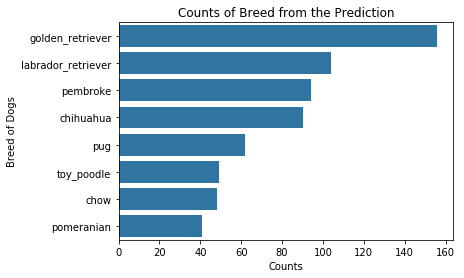

In [160]:
order = df.breed.value_counts().iloc[:8].index
color = sb.color_palette()[0]
sb.countplot(data = df, y = 'breed', order = order, color = color)
plt.title('Counts of Breed from the Prediction')
plt.ylabel('Breed of Dogs')
plt.xlabel('Counts');

Then, I want to know which breed is the most popular among the tweets.

In [161]:
df_popular = df.groupby('breed', as_index= False)['favorite_count','retweet_count'].sum()

In [162]:
df_popular.sort_values('favorite_count', ascending = False).head(8)

,breed,favorite_count,retweet_count
45,golden_retriever,1813430,523667
62,labrador_retriever,1127270,348838
80,pembroke,974236,259702
27,chihuahua,721445,231543
41,french_bulldog,564464,144797
88,samoyed,518883,171135
28,chow,420442,117930
30,cocker_spaniel,380932,130706


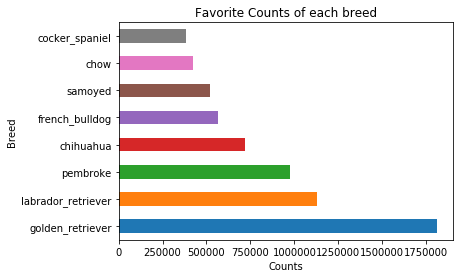

In [163]:
fav = df_popular.sort_values('favorite_count', ascending = False).head(8)
fav.plot(x = 'breed' , y = 'favorite_count', kind = 'barh' , legend = False, title = 'Favorite Counts of each breed' )
plt.ylabel('Breed')
plt.xlabel('Counts');

In [164]:
avg_pop = df.groupby('breed', as_index= False)['favorite_count','retweet_count'].mean()

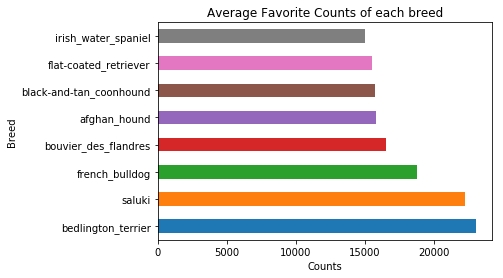

In [165]:
avg_pop.sort_values('favorite_count', ascending = False).head(8).plot(x = 'breed' , y = 'favorite_count', kind = 'barh' , legend = False, title = 'Average Favorite Counts of each breed' )
plt.ylabel('Breed')
plt.xlabel('Counts');

In [166]:
df_popular.sort_values('retweet_count', ascending = False).head(8)

,breed,favorite_count,retweet_count
45,golden_retriever,1813430,523667
62,labrador_retriever,1127270,348838
80,pembroke,974236,259702
27,chihuahua,721445,231543
88,samoyed,518883,171135
41,french_bulldog,564464,144797
30,cocker_spaniel,380932,130706
28,chow,420442,117930


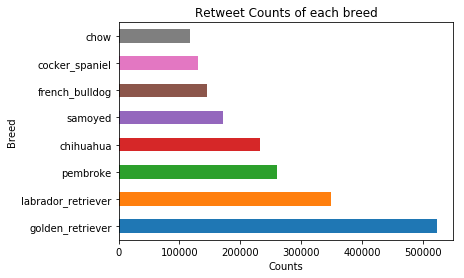

In [167]:
retweet = df_popular.sort_values('retweet_count', ascending = False).head(8)
retweet.plot(x = 'breed' , y = 'retweet_count', kind = 'barh' , legend = False, title = 'Retweet Counts of each breed' )
plt.ylabel('Breed')
plt.xlabel('Counts');

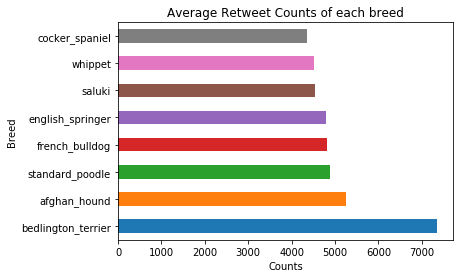

In [168]:
avg_pop.sort_values('retweet_count', ascending = False).head(8).plot(x = 'breed' , y = 'retweet_count', kind = 'barh' , legend = False, title = 'Average Retweet Counts of each breed' )
plt.ylabel('Breed')
plt.xlabel('Counts');

In [169]:
df[df['breed'] == 'bedlington_terrier'].shape[0]

6

In [170]:
df[df['breed'] == 'afghan_hound'].shape[0]

3

The average counts of each breed are different from the overall counts may caused by the fewer tweets with higher favorites and retweets.

Then, I would like to know which breed has the highest overall rating score.

First, I calculate the score with the giving numerator and denominator.

In [171]:
df['score'] = df['rating_numerator']/df['rating_denominator']

Then, I calculate the mean score of each breed.

In [172]:
score = df.groupby('breed', as_index= False)['score'].mean()

In [173]:
score.sort_values('score', ascending = False).head(8)

,breed,score
29,clumber,2.700000
18,bouvier_des_flandres,1.300000
81,pomeranian,1.253659
87,saluki,1.250000
21,briard,1.233333
101,tibetan_mastiff,1.225000
15,border_terrier,1.214286
99,standard_schnauzer,1.200000


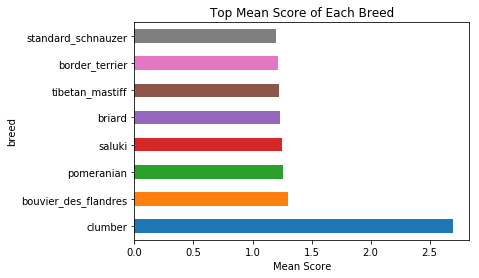

In [174]:
sc=score.sort_values('score', ascending = False).head(8)
sc.plot(x = 'breed', y = 'score',kind = 'barh', legend = False)
plt.xlabel('Mean Score')
plt.title('Top Mean Score of Each Breed');

In [175]:
df[df['breed'] == 'clumber'].shape[0]

1

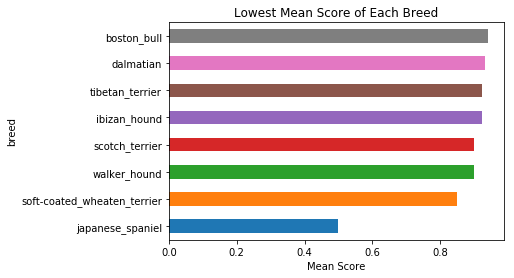

In [176]:
scl=score.sort_values('score').head(8)
scl.plot(x = 'breed', y = 'score',kind = 'barh', legend = False)
plt.xlabel('Mean Score')
plt.title('Lowest Mean Score of Each Breed');

In [177]:
df[df['breed'] == 'japanese_spaniel'].shape[0]

1

In [178]:
df.groupby('dog_stage',as_index= False)['score'].mean()

,dog_stage,score
0,doggo,1.190566
1,"doggo,floofer",1.100000
2,"doggo,pupper",1.114286
3,"doggo,puppo",1.300000
4,floofer,1.200000
5,pupper,1.096386
6,puppo,1.195238


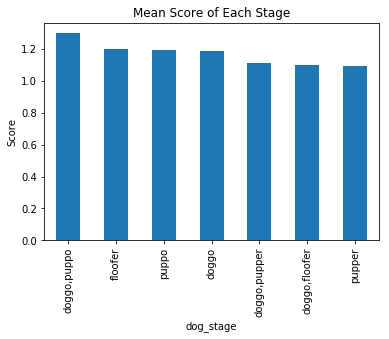

In [179]:
stage_score = df.groupby('dog_stage', as_index= False)['score'].mean()
stage_score.sort_values('score', ascending=False).reset_index(drop = True).plot(x = 'dog_stage', kind = 'bar', legend= False)
plt.ylabel('Score')
plt.title('Mean Score of Each Stage');

### Summary
>1. Golden retriever, labrador retriever, pembroke and chihuahua are the most common breeds from the data set.
>2. Golden retriever is the most popular one from all the other dogs.
>3. Bedlington_terrier has the highest favorite and retweet counts.
>4. Clumber has the highest average score, japanese_spaniel has the lowest average score.
>5. Dogs in doggo,poppo stage have the highest average score from all the stages.